In [253]:
import pandas as pd
from datetime import date
from datetime import datetime, timedelta
from PIL import Image
import numpy as np


# Obtener la fecha actual
hoy = datetime.now()

# Calcular la fecha de mañana
mañana = hoy + timedelta(days=1)

# Mostrar la fecha de mañana
print("Fecha de mañana:", mañana.strftime("%Y-%m-%d"))

import matplotlib.pyplot as plt
import numpy as np


link = "https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
nombres_colum = ['year', 'month', 'day', "SSN"]

datos_todos = pd.read_csv(link, delim_whitespace=True, skiprows=2, names=nombres_colum)

datos_todos['fecha'] = pd.to_datetime(datos_todos[['year', 'month', 'day']])

fecha_limite = pd.to_datetime("2012-01-01")
datos_hasta_2017 = datos_todos[datos_todos['fecha'] < fecha_limite]
columna_cuarta = datos_hasta_2017['SSN'].to_numpy().astype(int)
array_columna_3 = datos_hasta_2017['day'].to_numpy()
dias = np.arange(1, len(array_columna_3)+ 1)

Fecha de mañana: 2024-09-03


<font size="5">**Punto 1**.</font>


<font size="4">***Inciso 1.1***.</font>


In [254]:
ruido_x = 0.5 * np.random.normal(size=dias.shape)
dias_perturbados = dias + ruido_x
y=columna_cuarta
frecuencia_muestreo=1 #De los datos uno puede ver que es un día, de (datos_todos.diff()["fecha"].mode()[0]).
frecuencias=np.fft.fftfreq(len(y),frecuencia_muestreo)
transformada=np.fft.fft(y)
modulo=abs(transformada)
modulo_sin_corrimiento=modulo[1:] #Tocó quitar el primero porque por mucho ruido que le metí no funcionó.
indice_max=np.argmax(modulo_sin_corrimiento)
modulo_max,frecuencia_principal=modulo[indice_max+1],np.abs(frecuencias[indice_max+1])
periodo=(1/frecuencia_principal)/365
print("El período del ciclo de actividad solar es " + str(periodo)+ " años")


El período del ciclo de actividad solar es 11.173972602739726 años


<font size="4">***Inciso 1.2***.</font>


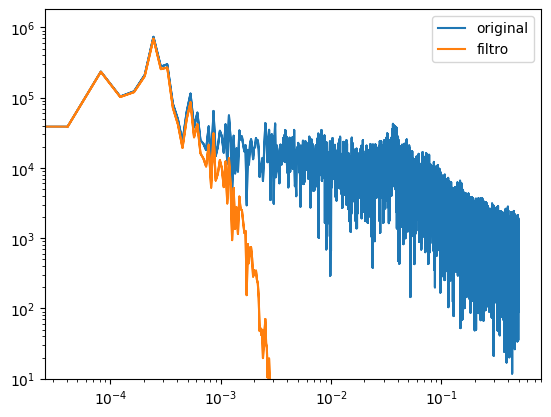

In [255]:
#1.2.a
frecuencias_abs=np.abs(frecuencias)

def gauss(alpha,f):
    return np.exp(-(alpha*f)**2)

t_filtrada=transformada*gauss(1000,frecuencias_abs)

plt.plot(frecuencias_abs,modulo,label="original")

plt.plot(frecuencias_abs,np.abs(t_filtrada),label="filtro")

plt.ylim(10,)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

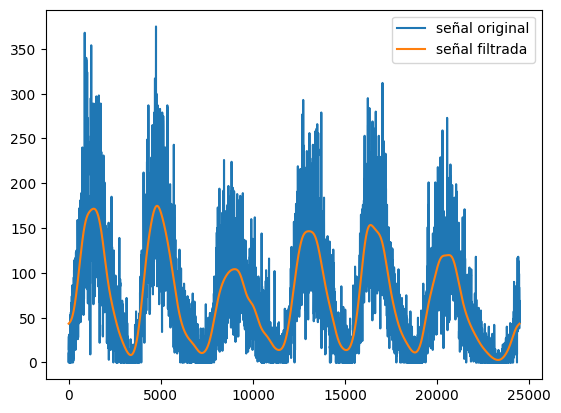

In [256]:
#1.2.b
señal_filtra=np.fft.ifft(t_filtrada)
rial_my_nigga=np.abs(señal_filtra)

plt.plot(dias,y,label="señal original")

plt.plot(dias,rial_my_nigga,label="señal filtrada")
plt.legend()
plt.show()


<font size="4">***Inciso 1.3***.</font>

La cantidad de manchas solares son 162, lo cual cuadra con lo predicho.
La fase es 0.13 esto es que estamos en el ciclo ascendente. Se puede ver en la gráfica de fases


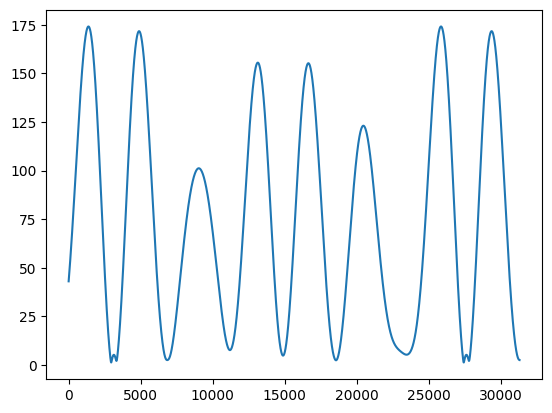

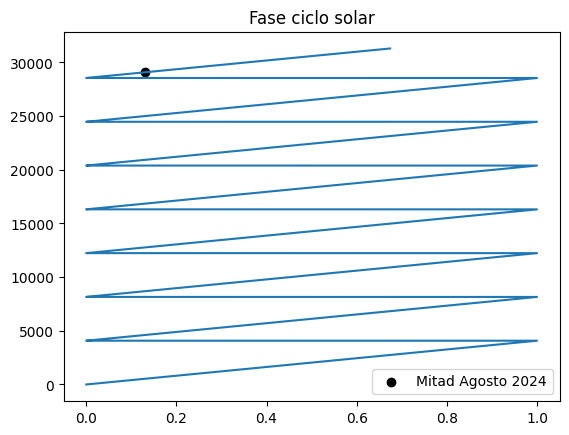

In [257]:
n=10
i_n=frecuencias[:n]
f_n=frecuencias[-n:]
f_k=np.concatenate((i_n,f_n))


i_n_t=transformada[:n]
f_n_t=transformada[-n:]
T_k=np.concatenate((i_n_t,f_n_t))

primera_fecha=(datos_hasta_2017['fecha'].min()).date()
papu_fecha=date(2030,9,11)
dias=(papu_fecha-primera_fecha).days
array_dias=np.arange(1,dias+1)
dias,len(array_dias)

def IFT(F, f, t, N=0):
    if N==0:
        N = np.size(t)
    inv = np.zeros(len(t)) + 0j
    for k in range(len(t)):
        inv[k] = (1/N)*(F*np.exp(np.pi*(2j)*f*t[k])).sum()
    return (t, inv)
inversa=IFT(T_k,f_k,array_dias, len(frecuencias))
abs_inv=abs(inversa[1])

#Ahora buscamos el índice de 2024-08-15
mitad_agosto=date(2024,8,15)
dias_2=(mitad_agosto-primera_fecha).days
print("La cantidad de manchas solares son " + str(round(abs_inv[dias_2]))+ ", lo cual cuadra con lo predicho.")

phi = np.mod(array_dias*np.power(periodo*365,-1), 1)

print("La fase es",round(phi[dias_2],2), "esto es que estamos en el ciclo ascendente. Se puede ver en la gráfica de fases")
plt.plot(array_dias,abs_inv)
plt.show()
plt.scatter(phi[dias_2], dias_2, label="Mitad Agosto 2024", c="k")
plt.plot(phi, array_dias)
plt.title("Fase ciclo solar")
plt.legend()
plt.show()

<font size="5">**Punto 2**.</font>

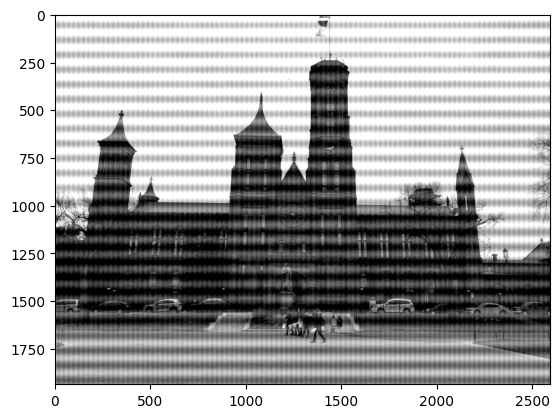

In [258]:
Image_url = "Noisy_Smithsonian_Castle.jpg"
img = np.array(Image.open(Image_url)).astype(float)
plt.imshow(img, cmap='gray')
plt.show()

<font size="4">**Punto 2.1**.</font>

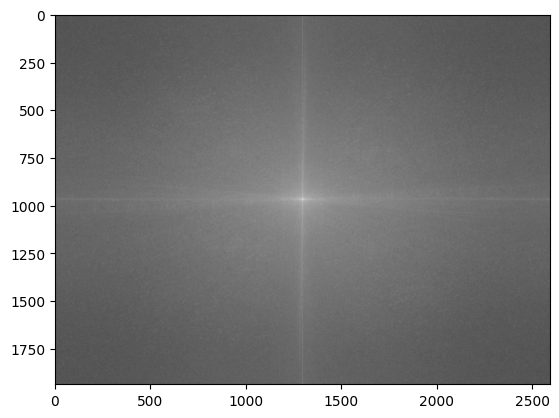

In [259]:
transform = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(np.log(np.absolute(transform)), cmap="gray")
plt.show()

<font size="4">**Punto 2.2**.</font>

C:\Users\danie\AppData\Local\Temp\ipykernel_13664\1112942706.py:14: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs_transf), cmap="gray")


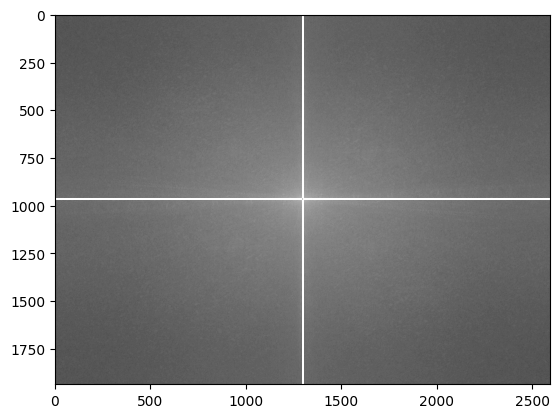

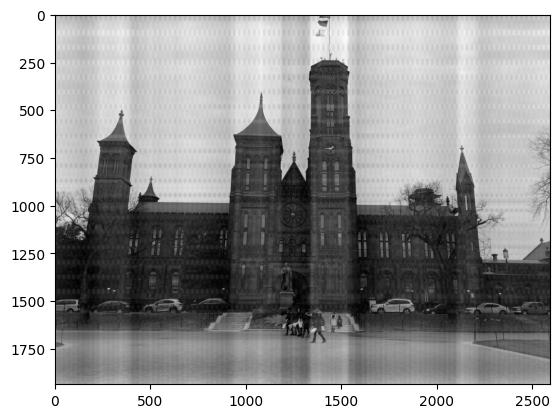

In [277]:
abs_transf = np.absolute(transform)
ycenter, xcenter = abs_transf.shape
ycenter = int(ycenter/2)
xcenter = int(xcenter/2)
abs_transf[ycenter, xcenter+20:] = 0
abs_transf[:ycenter-20, xcenter] = 0
abs_transf[ycenter+20:, xcenter] = 0
abs_transf[ycenter, :xcenter-20] = 0
transform[ycenter, xcenter+20:] = 0
transform[:ycenter-20, xcenter] = 0
transform[ycenter+20:, xcenter] = 0
transform[ycenter, :xcenter-20] = 0

plt.imshow(np.log(abs_transf), cmap="gray")
plt.show()
nwimg = np.fft.ifft2(np.fft.ifftshift(transform))
skibidi = np.absolute(nwimg)
plt.imshow(skibidi, cmap="gray")
plt.show()
